In [1]:
# Setup and Data Loading
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

# Clone repository if not exists and load data
if not os.path.exists('2155-Challenge-Problem-2'):
    import subprocess
    print("Cloning repository...")
    subprocess.run(['git', 'clone', 'https://github.com/Lyleregenwetter/2155-Challenge-Problem-2'], 
                   check=True, cwd='.')
    print("Repository cloned!")

# Change to the repository directory and load data
os.chdir('2155-Challenge-Problem-2')

# Import utilities
from utils_public import load_grids, plot_n_grids

print("Loading data...")
grids = load_grids()
ratings = np.load("datasets/scores.npy")

print(f"Grids shape: {grids.shape}")
print(f"Ratings shape: {ratings.shape}")
print(f"Available ratings per advisor: {(~np.isnan(ratings)).sum(axis=0)}")

# advisor_names = ["Wellness", "Tax", "Transportation", "Business"]

# Change back to parent directory for saving results
os.chdir('..')

Loading data...
Grids shape: (500000, 7, 7)
Ratings shape: (500000, 4)
Available ratings per advisor: [5000 5000 5000 5000]


In [2]:
# Reload the oracle module to get the latest changes
import importlib
import sys
if 'oracle' in sys.modules:
    importlib.reload(sys.modules['oracle'])
from oracle import TransportationOracle

# Initialize Transportation Oracle
transportation_oracle = TransportationOracle()
print("Transportation Oracle initialized!")

# Select grids and ratings for Transportation advisor (not nan, index 0)
transportation_index = 2
grids_subset = grids[~np.isnan(ratings[:, transportation_index])]
ratings_subset = ratings[~np.isnan(ratings[:, transportation_index]), transportation_index]

# Get model scores
model_scores, train_data, test_data = transportation_oracle.fit_model(grids_subset, ratings_subset)
print("Model Scores:", model_scores)

predictions = transportation_oracle.predict(grids_subset)
print("Predictions shape:", predictions.shape)

Transportation Oracle initialized!

Training AutoGluon model for Business Advisor
Available training samples: 5000
Creating features...
Creating features for Transportation Advisor...
🔧 Creating advanced transportation connectivity features...
Created 28 connectivity features
Created 5 flow optimization features
✅ Total transportation features: 33
   - Connectivity: 28
   - Flow optimization: 5
Creating features for Transportation Advisor...
🔧 Creating advanced transportation connectivity features...
Created 28 connectivity features
Created 5 flow optimization features
✅ Total transportation features: 33
   - Connectivity: 28
   - Flow optimization: 5
Creating features for Transportation Advisor...
🔧 Creating advanced transportation connectivity features...
Created 28 connectivity features


No path specified. Models will be saved in: "AutogluonModels\ag-20251027_181622"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       12.86 GB / 31.67 GB (40.6%)
Disk Space Avail:   720.25 GB / 951.65 GB (75.7%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies o

Created 5 flow optimization features
✅ Total transportation features: 33
   - Connectivity: 28
   - Flow optimization: 5


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-10-27 14:16:28,411	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8268 
		Context path: "c:\Users\Lenovo\2156_cp2\AutogluonModels\ag-20251027_181622\ds_sub_fit\sub_fit_ho"
(_dystack pid=33600) Running DyStack sub-fit ...
(_dystack pid=33600) Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
(_dystack pid=33600) Beginning AutoGluon training ... Time limit = 34s
(_dystack pid=33600) AutoGluon will save models to "c:\Users\Lenovo\2156_cp2\AutogluonModels\ag-20251027_181622\ds_sub_fit\sub_fit_ho"
(_dystack pid=33600) Train Data Rows:    3555
(_dystack pid=33600) Train Data Columns: 33
(_dystack pid=33600) Label Column:       target
(_dystack pid=33600) Problem Type:       regression
(_dystack pid

Model Scores: 0.3667468616964643
Creating features for all 5000 grids...
Creating features for Transportation Advisor...
🔧 Creating advanced transportation connectivity features...
Created 28 connectivity features
Created 5 flow optimization features
✅ Total transportation features: 33
   - Connectivity: 28
   - Flow optimization: 5
Making predictions with AutoGluon model...
Predictions shape: (5000,)


Making predictions on train set...
Making predictions on test set...


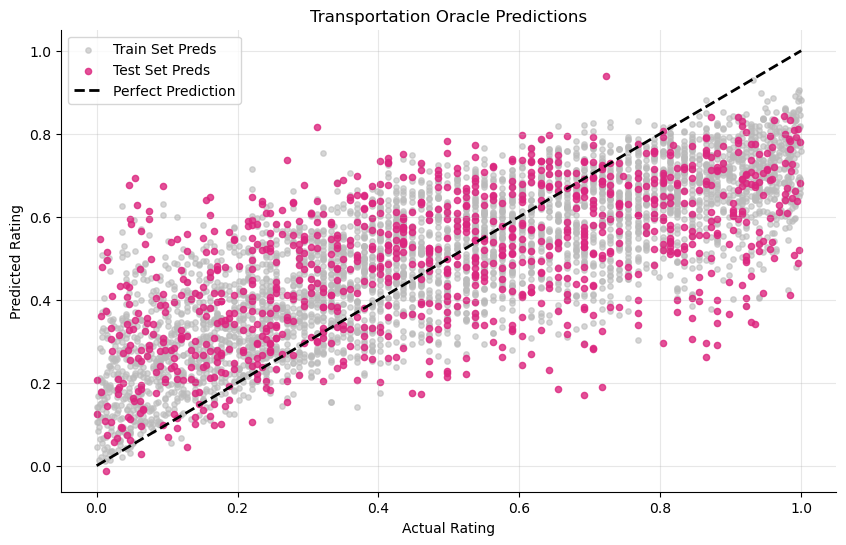

Transportation Oracle Train Set R² score: 0.6277
Transportation Oracle Test Set R² score: 0.3667

Model Performance Summary:
Training R²:   0.6277
Test R²:       0.3667
Overfitting:   Yes (0.2609)
Performance:   Poor


In [3]:
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test):
    #Create scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=15, c="#BBBBBB", alpha=0.6) #train set in gray
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=20, c="#DC267F", alpha=0.8) #test set in magenta
    plt.plot([0,1], [0,1], label="Perfect Prediction", linewidth=2, c="k", linestyle='--') #target line in black

    #Set axis labels and title
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title("Transportation Oracle Predictions")

    #Turn off top and right spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend() #Display legend
    plt.grid(True, alpha=0.3)
    plt.show() #Show plot

    #Calculate R2 score for train and test sets
    train_r2 = r2_score(ratings_train, preds_train)
    test_r2 = r2_score(ratings_test, preds_test)
    
    print(f"Transportation Oracle Train Set R² score: {train_r2:.4f}")
    print(f"Transportation Oracle Test Set R² score: {test_r2:.4f}")
    
    return train_r2, test_r2

# Extract the actual ratings from train and test data
ratings_train = train_data['target'].values
ratings_test = test_data['target'].values

# Remove the target column to get just the features for prediction
train_features = train_data.drop('target', axis=1)
test_features = test_data.drop('target', axis=1)

# Make predictions on the train and test features
print("Making predictions on train set...")
preds_train = transportation_oracle.model.predict(train_features)

print("Making predictions on test set...")
preds_test = transportation_oracle.model.predict(test_features)

# Create the plot and get R² scores
train_r2, test_r2 = plot_and_r2(preds_train, preds_test, ratings_train, ratings_test)

# Additional analysis
print(f"\nModel Performance Summary:")
print(f"{'='*40}")
print(f"Training R²:   {train_r2:.4f}")
print(f"Test R²:       {test_r2:.4f}")
print(f"Overfitting:   {'Yes' if (train_r2 - test_r2) > 0.1 else 'No'} ({train_r2 - test_r2:.4f})")
print(f"Performance:   {'Excellent' if test_r2 > 0.9 else 'Good' if test_r2 > 0.8 else 'Fair' if test_r2 > 0.6 else 'Poor'}")

In [4]:
# save model in pkl file
transportation_oracle.save_model('transportation_oracle_model.pkl')

# --- IGNORE ---
# instructions on how to use exported model
# from oracle import TransportationOracle
# transportation_oracle = TransportationOracle.load_model("transportation_oracle_model.pkl")
# --- IGNORE ---